# Lab Task 3

**Name**: Tazmeen Afroz  
**Roll No**: 22p-9252  
**Section**: BAI-5A  

---


#### Basic Insights

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing



df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Diamond Dataset Information

| Column  | Description  | Range/Values  |
|---------|--------------|---------------|
| **price**  | Price in US dollars | \$326–\$18,823 |
| **carat**  | Weight of the diamond | 0.2–5.01 carats |
| **cut**  | Quality of the cut | Fair, Good, Very Good, Premium, Ideal |
| **color**  | Diamond color (J = worst, D = best) | J–D |
| **clarity**  | Measurement of how clear the diamond is | I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best) |
| **x**  | Length of the diamond in mm | 0–10.74 mm |
| **y**  | Width of the diamond in mm | 0–58.9 mm |
| **z**  | Depth of the diamond in mm | 0–31.8 mm |
| **depth**  | Total depth percentage = \(\frac{2 \cdot z}{x + y}\) | 43–79% |
| **table**  | Width of the top of the diamond relative to the widest point | 43–95% |



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
df.describe(include="all").T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,NaN,NaN,NaN,26970.5,15571.281097,1.0,13485.75,26970.5,40455.25,53940.0
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9


In [4]:


numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)


Numerical variables: ['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Categorical variables: ['cut', 'color', 'clarity']


In [5]:


categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 3
Number of numerical variables: 8


#### Visualization

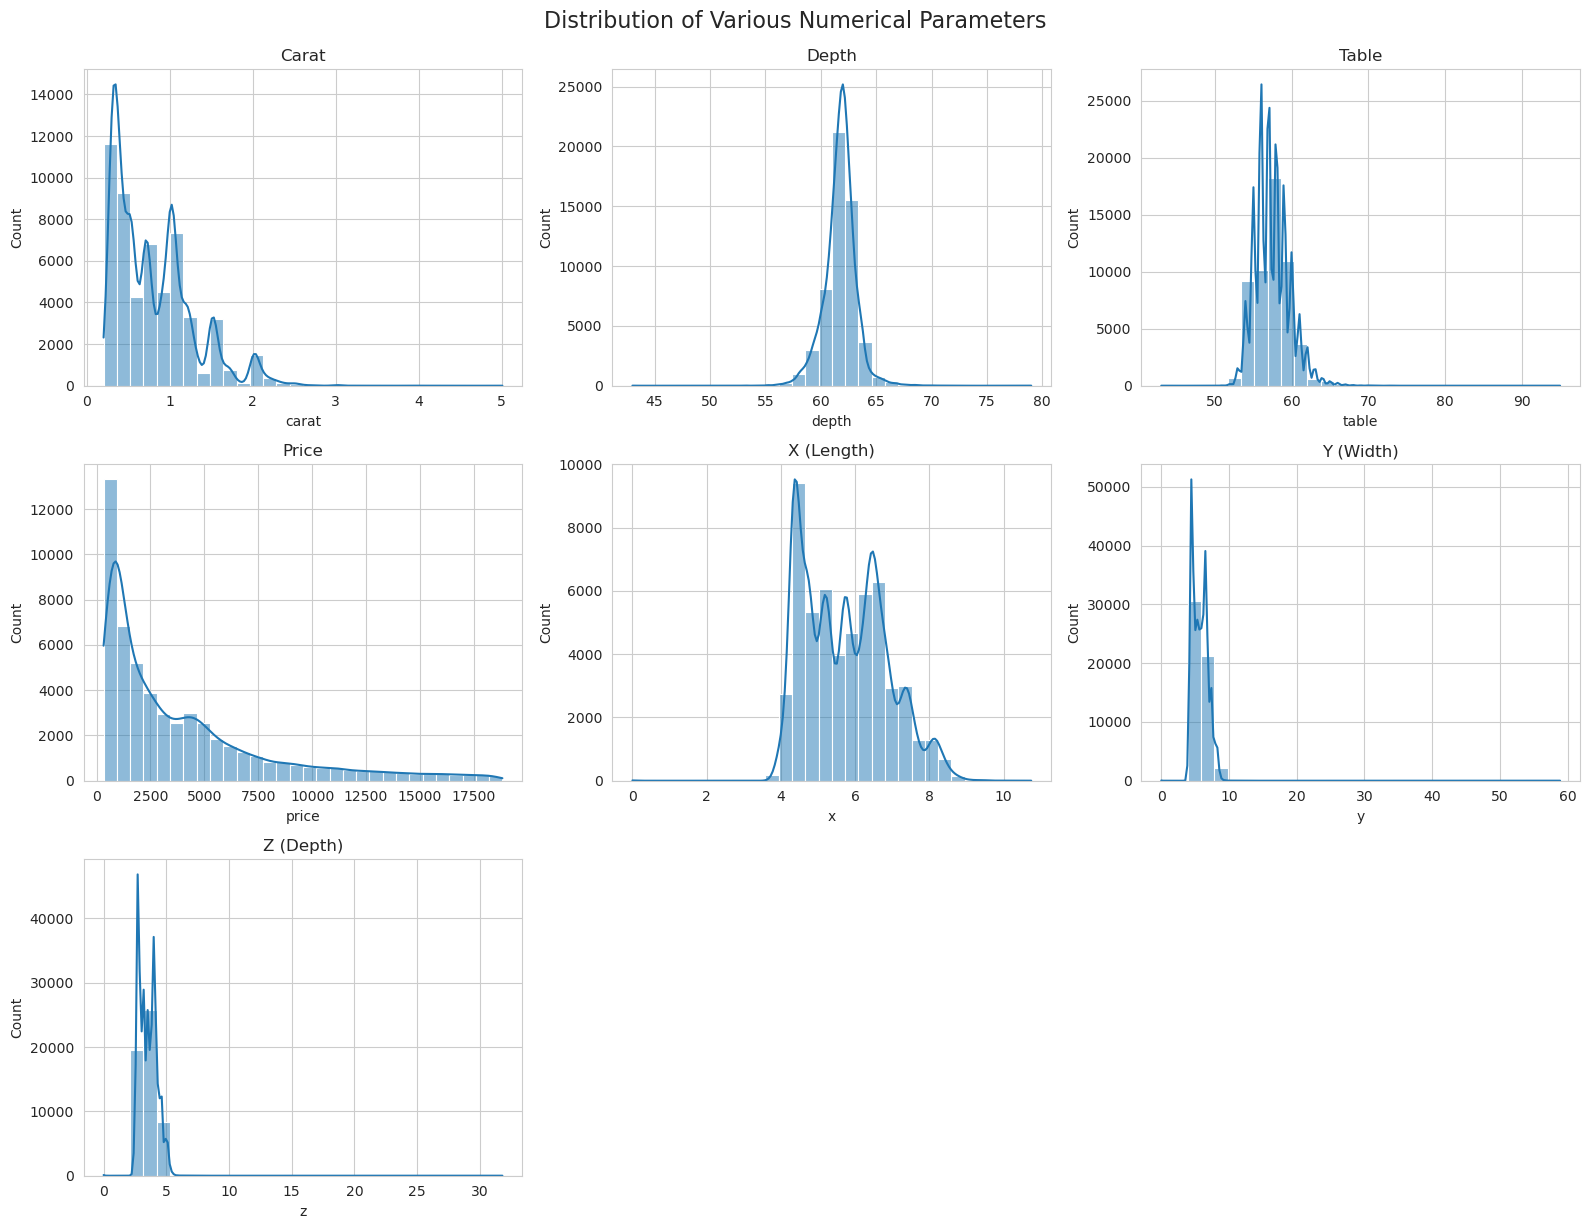

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.set_style("whitegrid")


plt.figure(figsize=(16, 12))

# Subplot 1 - Carat
plt.subplot(3, 3, 1)
sns.histplot(df['carat'], bins=30, kde=True)
plt.title('Carat')

# Subplot 2 - Depth
plt.subplot(3, 3, 2)
sns.histplot(df['depth'], bins=30, kde=True)
plt.title('Depth')

# Subplot 3 - Table
plt.subplot(3, 3, 3)
sns.histplot(df['table'], bins=30, kde=True)
plt.title('Table')

# Subplot 4 - Price
plt.subplot(3, 3, 4)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price')

# Subplot 5 - X (Length)
plt.subplot(3, 3, 5)
sns.histplot(df['x'], bins=30, kde=True)
plt.title('X (Length)')

# Subplot 6 - Y (Width)
plt.subplot(3, 3, 6)
sns.histplot(df['y'], bins=30, kde=True)
plt.title('Y (Width)')

# Subplot 7 - Z (Depth)
plt.subplot(3, 3, 7)
sns.histplot(df['z'], bins=30, kde=True)
plt.title('Z (Depth)')

# Show the plot
plt.tight_layout()
plt.suptitle('Distribution of Various Numerical Parameters', fontsize=16, y=1.02)
plt.show()




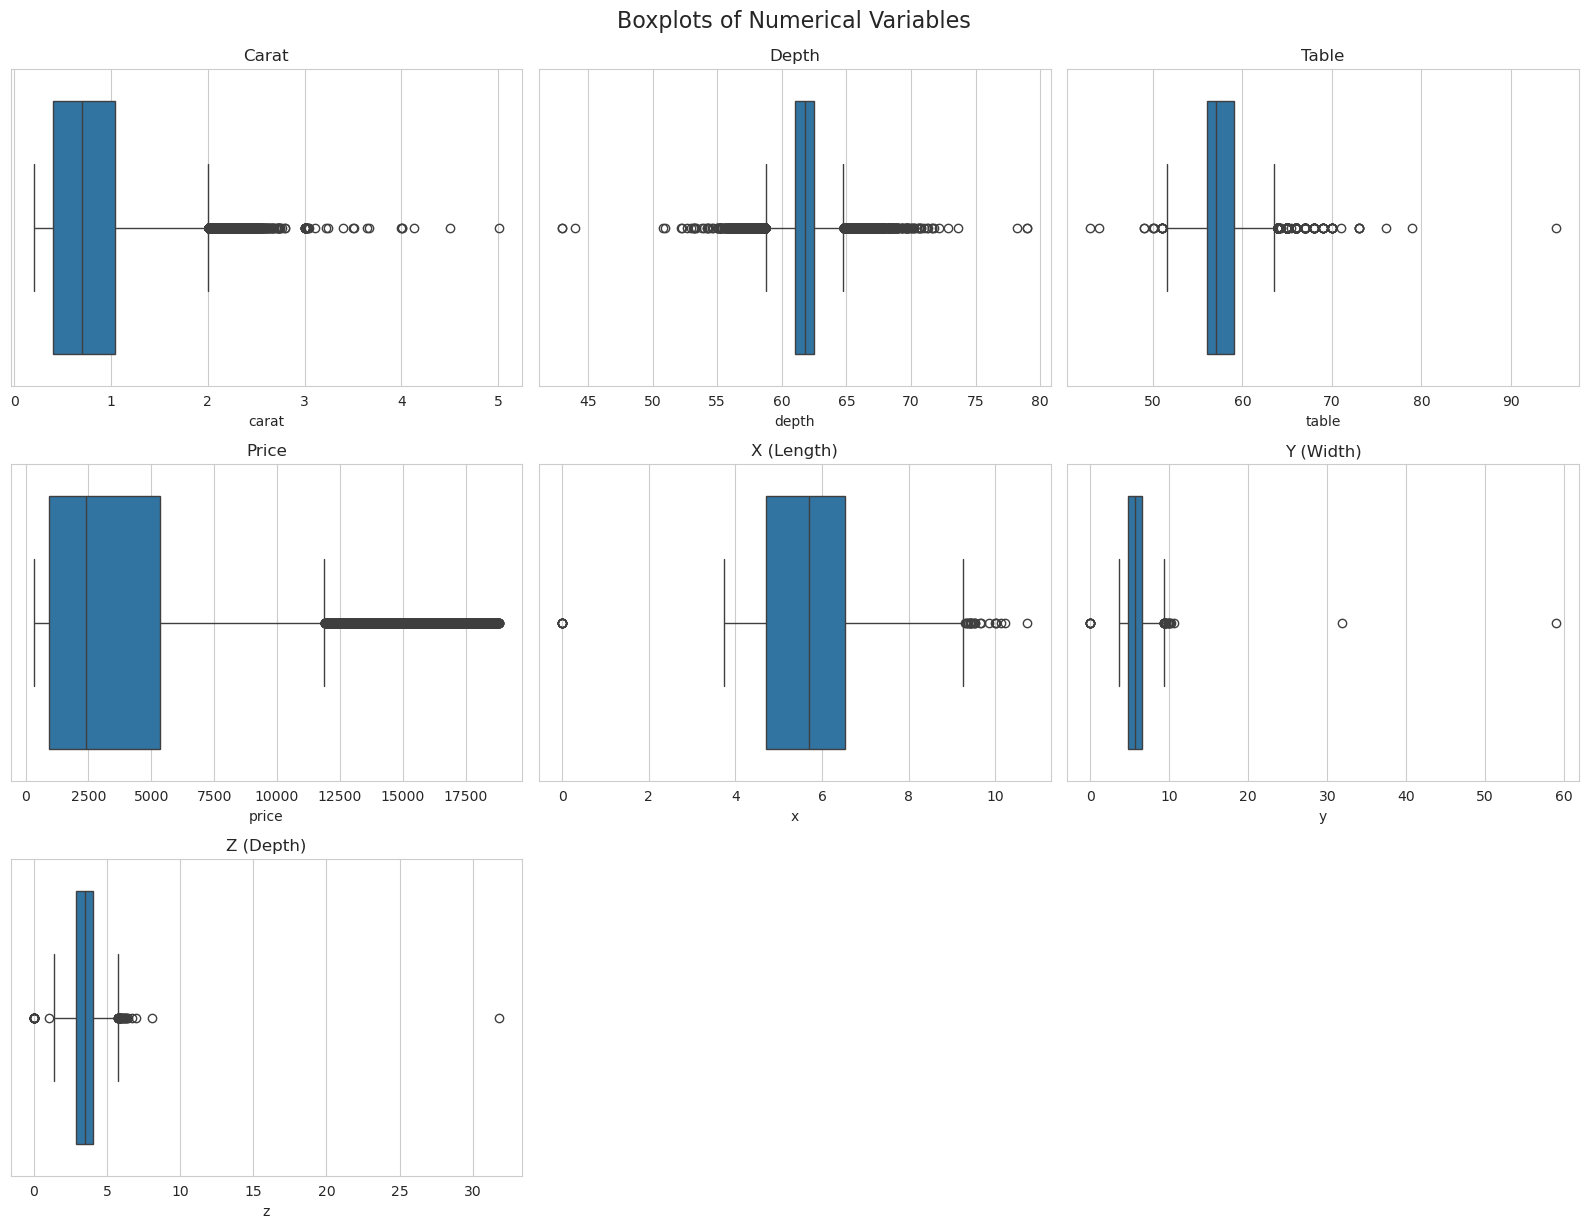

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")


plt.figure(figsize=(16, 12))

# Subplot 1 - Carat
plt.subplot(3, 3, 1)
sns.boxplot(x=df['carat'])
plt.title('Carat')

# Subplot 2 - Depth
plt.subplot(3, 3, 2)
sns.boxplot(x=df['depth'])
plt.title('Depth')

# Subplot 3 - Table
plt.subplot(3, 3, 3)
sns.boxplot(x=df['table'])
plt.title('Table')

# Subplot 4 - Price
plt.subplot(3, 3, 4)
sns.boxplot(x=df['price'])
plt.title('Price')

# Subplot 5 - X (Length)
plt.subplot(3, 3, 5)
sns.boxplot(x=df['x'])
plt.title('X (Length)')

# Subplot 6 - Y (Width)
plt.subplot(3, 3, 6)
sns.boxplot(x=df['y'])
plt.title('Y (Width)')

# Subplot 7 - Z (Depth)
plt.subplot(3, 3, 7)
sns.boxplot(x=df['z'])
plt.title('Z (Depth)')

# Adjust layout
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Variables', fontsize=16, y=1.02)
plt.show()


#### Cleaning

In [8]:

missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [9]:

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


Original data shape: (53940, 11)
Data shape after removing outliers: (47699, 11)


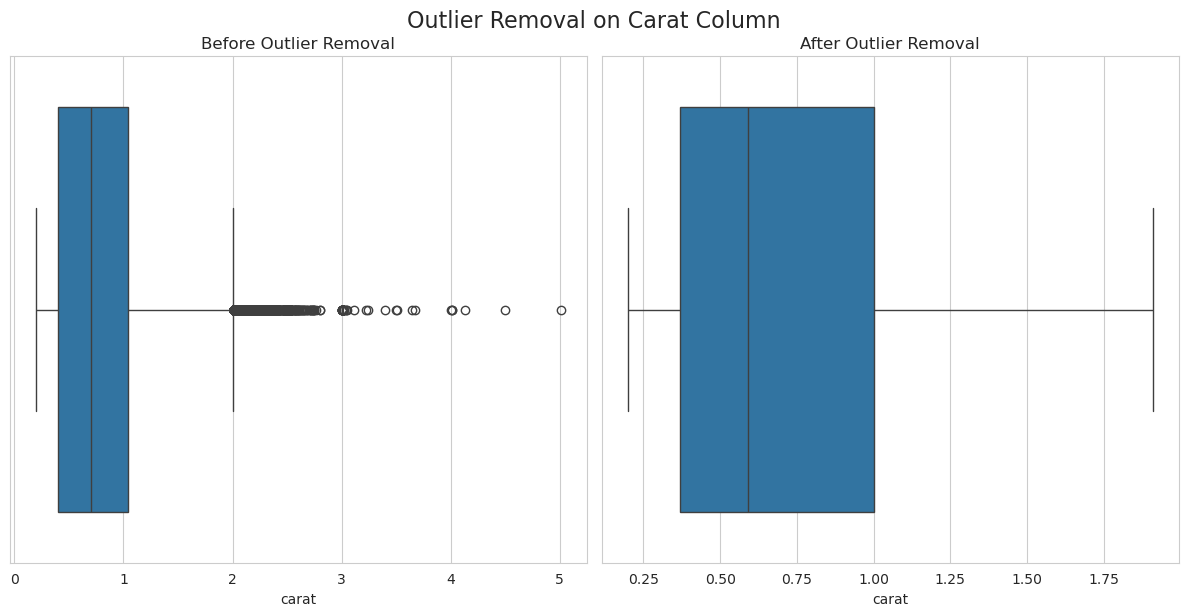

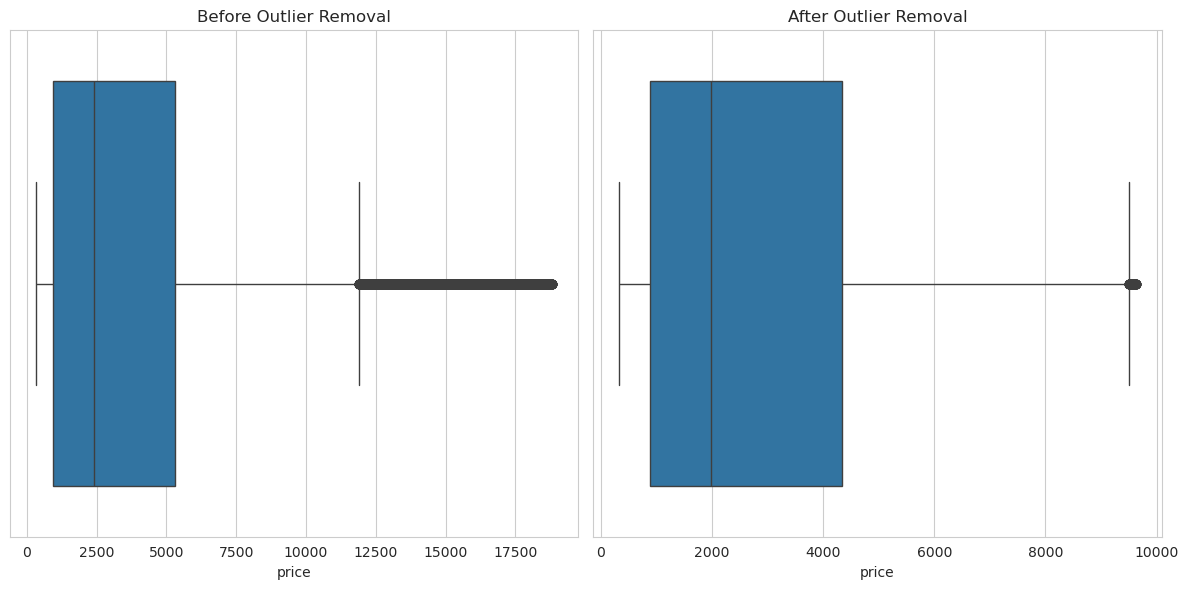

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")


def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df_filtered_carat = remove_outliers_iqr(df, 'carat')
df_filtered_price = remove_outliers_iqr(df_filtered_carat, 'price')
df_filtered_table = remove_outliers_iqr(df_filtered_price, 'table')
df_filtered_y = remove_outliers_iqr(df_filtered_table, 'y')
df_filtered_z = remove_outliers_iqr(df_filtered_y, 'z')


print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_filtered_price.shape}")

df_cleaned = df_filtered_price.copy()

plt.figure(figsize=(12, 6))

# Subplot 1 - Before Outlier Removal
plt.subplot(1, 2, 1)
sns.boxplot(x=df['carat'])
plt.title('Before Outlier Removal')

# Subplot 2 - After Outlier Removal
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['carat'])
plt.title('After Outlier Removal')


plt.tight_layout()
plt.suptitle('Outlier Removal on Carat Column', fontsize=16, y=1.02)


plt.show()


plt.figure(figsize=(12, 6))

# Subplot 1 - Before Outlier Removal
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Before Outlier Removal')

# Subplot 2 - After Outlier Removal
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['price'])
plt.title('After Outlier Removal')


plt.tight_layout()


In [11]:
from sklearn.preprocessing import  MinMaxScaler


numerical_vars = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


# MinMaxScaler
min_max_scaler = MinMaxScaler()
df_cleaned = df_filtered_price.copy()
df_cleaned[numerical_vars] = min_max_scaler.fit_transform(df_cleaned[numerical_vars])


df_cleaned.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.017544,Ideal,E,SI2,0.525568,0.260870,0.000000,0.049661,0.066225,0.250696
1,2,0.005848,Premium,E,SI1,0.477273,0.782609,0.000000,0.036117,0.035320,0.217270
3,4,0.052632,Premium,I,VS2,0.551136,0.521739,0.000860,0.106095,0.121413,0.306407
4,5,0.064327,Good,J,SI2,0.576705,0.521739,0.000968,0.137698,0.147903,0.339833
5,6,0.023392,Very Good,J,VVS2,0.562500,0.434783,0.001075,0.047404,0.061810,0.264624


#### Encoding 

In [12]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pandas as pd


ordinal_cols = ['cut', 'color', 'clarity']
non_ordinal_cols = []

df_cleaned[ordinal_cols] = df_cleaned[ordinal_cols].astype(str)
df[ordinal_cols] = df[ordinal_cols].astype(str)


ordinal_encoder = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                                             ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                             ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
df_cleaned[ordinal_cols] = ordinal_encoder.fit_transform(df_cleaned[ordinal_cols])


if non_ordinal_cols:
    onehot_encoder = OneHotEncoder(sparse_output=False)
    onehot_encoded = onehot_encoder.fit_transform(df_cleaned[non_ordinal_cols])
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(non_ordinal_cols))
    df_cleaned = pd.concat([df_cleaned, onehot_encoded_df], axis=1).drop(columns=non_ordinal_cols)


df_cleaned.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.017544,4.0,5.0,1.0,0.525568,0.260870,0.000000,0.049661,0.066225,0.250696
1,2,0.005848,3.0,5.0,2.0,0.477273,0.782609,0.000000,0.036117,0.035320,0.217270
3,4,0.052632,3.0,1.0,3.0,0.551136,0.521739,0.000860,0.106095,0.121413,0.306407
4,5,0.064327,1.0,0.0,1.0,0.576705,0.521739,0.000968,0.137698,0.147903,0.339833
5,6,0.023392,2.0,0.0,5.0,0.562500,0.434783,0.001075,0.047404,0.061810,0.264624
